### EDA on the Cleaned Titanic Dataset
### Objective: Explore the cleaned data using statistics and visualizations

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Step 1: Load the Cleaned Dataset
### Load the cleaned Titanic dataset from Task 1

In [2]:
df = pd.read_csv('titanic_data.csv')

### Step 2: Generate Summary Statistics

In [3]:
print("Summary Statistics:")
print(df.describe(include='all'))  # Summary for all columns

Summary Statistics:
        PassengerId    Survived     Pclass                 Name         Age  \
count    775.000000  775.000000  775.00000                  775  775.000000   
unique          NaN         NaN        NaN                  775         NaN   
top             NaN         NaN        NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN        NaN                    1         NaN   
mean     445.806452    0.339355    2.48000                  NaN   -0.047099   
std      260.116285    0.473796    0.73439                  NaN    0.982304   
min        1.000000    0.000000    1.00000                  NaN   -2.224156   
25%      213.500000    0.000000    2.00000                  NaN   -0.565736   
50%      450.000000    0.000000    3.00000                  NaN   -0.104637   
75%      670.500000    1.000000    3.00000                  NaN    0.356462   
max      891.000000    1.000000    3.00000                  NaN    3.891554   

             SibSp       Parch 

### Check for any remaining missing values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


### Step 3: Visualize Numeric Features
### Histograms

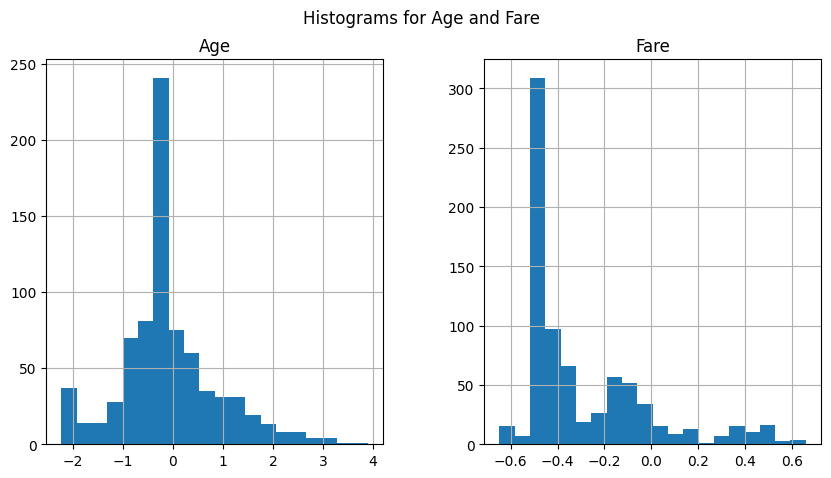

In [5]:
df.hist(column=['Age', 'Fare'], bins=20, figsize=(10, 5))
plt.suptitle("Histograms for Age and Fare")
plt.show()

### Boxplots

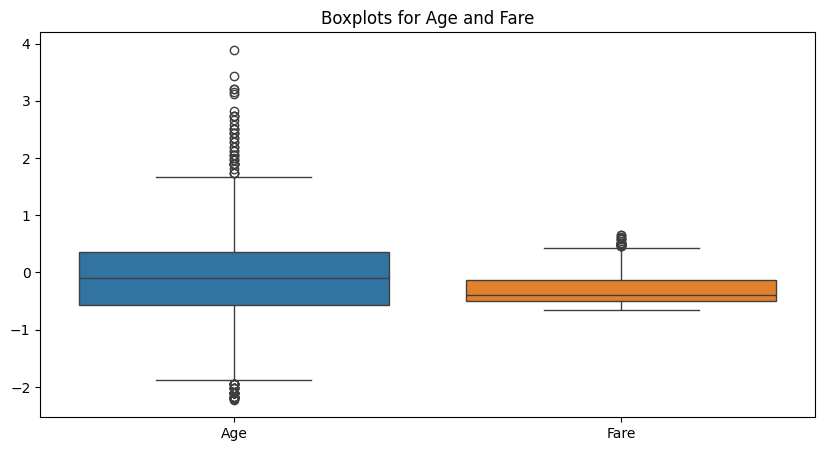

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()

### Step 4: Analyze Relationships Between Features
### Pairplot

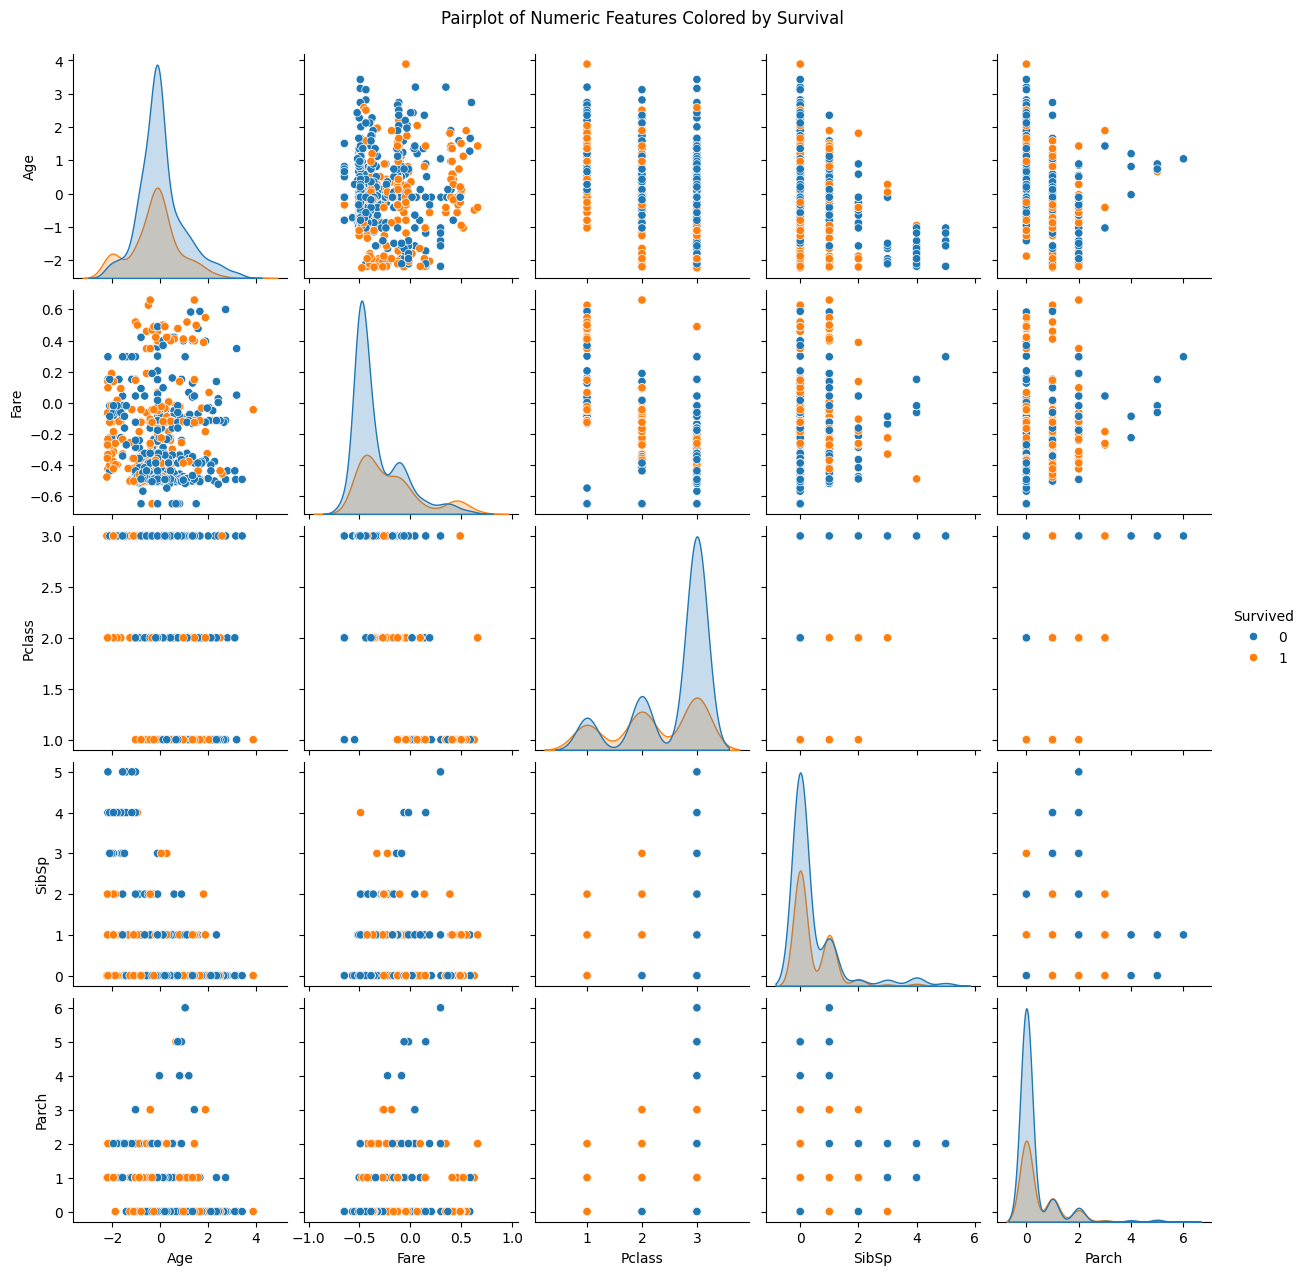

In [7]:
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features Colored by Survival", y=1.02)
plt.show()

### Correlation Matrix with Heatmap

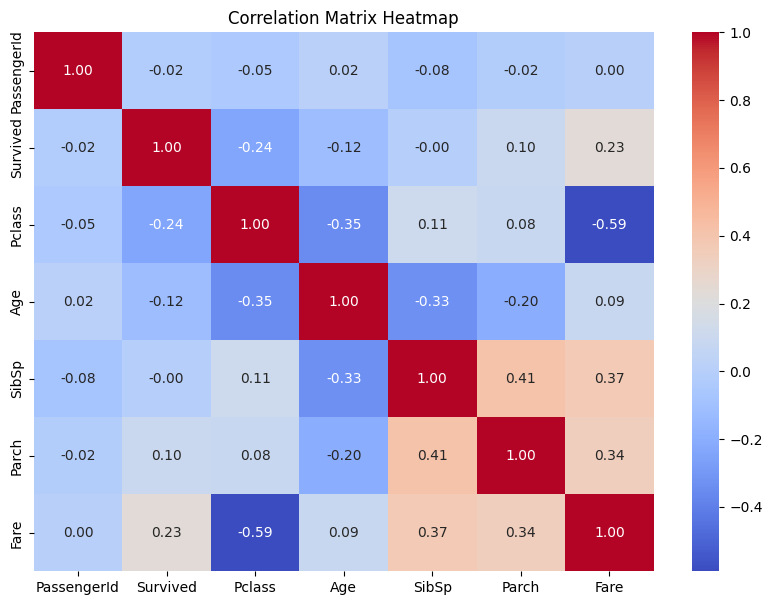

In [8]:
# Exclude non-numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Step 5: Identify Patterns and Trends
### Survival Rate by Gender

In [9]:
gender_survival = df.groupby('Sex_male')['Survived'].mean()
print("\nSurvival Rate by Gender (0 = Female, 1 = Male):")
print(gender_survival)


Survival Rate by Gender (0 = Female, 1 = Male):
Sex_male
False    0.688525
True     0.178908
Name: Survived, dtype: float64


### Survival Rate by Passenger Class

In [10]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(class_survival)


Survival Rate by Passenger Class:
Pclass
1    0.508929
2    0.486034
3    0.245868
Name: Survived, dtype: float64


### Visualizing Survival Rates

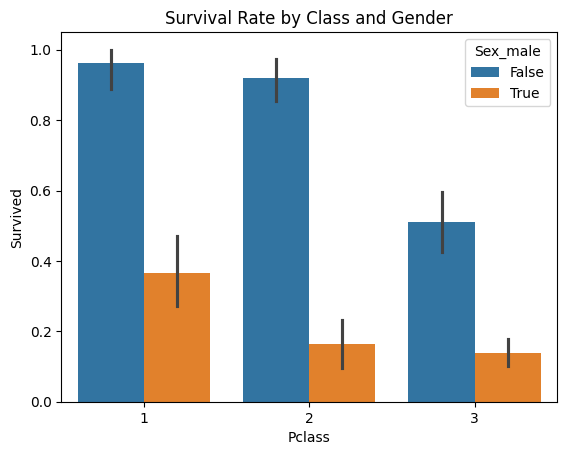

In [11]:
sns.barplot(x="Pclass", y="Survived", hue="Sex_male", data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()

### Step 6: Optional Interactive Visualizations with Plotly
### Age Distribution by Survival

In [12]:
fig = px.histogram(df, x="Age", color="Survived", nbins=20, title="Age Distribution by Survival")
fig.show()

### Fare by Class and Survival

In [13]:
fig = px.box(df, x="Pclass", y="Fare", color="Survived", title="Fare by Class and Survival")
fig.show()